In [27]:
import numpy as np
import pandas as pd
data = pd.read_csv('数据整合.csv')
data.head()

,Formula,Band gap,MP-ID,density,vpa,packing fraction,Central symmetry
0,Ba3Ca2(SiN3)2,1.875,mp-1019520,4.570851,17.671158,0.834911,0
1,IrI3,1.398,mp-1025442,6.805422,34.949094,0.320381,0
2,ThTe3,1.088,mp-1025522,6.862531,37.193373,0.395979,0
3,Y4Se3N2,1.445,mp-1029349,4.989108,22.947597,0.576815,0
4,RbSbO2,2.277,mp-10418,4.731690,20.988543,0.821177,0


In [28]:
data['Central symmetry'].value_counts()

1    310
0    297
Name: Central symmetry, dtype: int64

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [30]:
y = data['Central symmetry'].values
excluded = ['Formula', 'MP-ID', 'Central symmetry']
X = data.drop(excluded, axis = 1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [32]:
model_DTC = DecisionTreeClassifier()
path = model_DTC.cost_complexity_pruning_path(X_train, y_train)

param_grid = {'ccp_alpha': path.ccp_alphas}
kfold = KFold(n_splits = 10, shuffle = True, random_state =14)
model_DTC = GridSearchCV(DecisionTreeClassifier(random_state = 123),
                     param_grid, cv = kfold)
model_DTC.fit(X_train, y_train)
model_DTC.score(X_test, y_test)

0.8306010928961749

In [33]:
model_DTC.best_params_

{'ccp_alpha': 0.015848476904388453}

In [34]:
model_test = DecisionTreeClassifier(random_state = 123, ccp_alpha = 0.00205)
model_test.fit(X_train, y_train)
model_test.score(X_test, y_test)

0.7759562841530054

In [35]:
modelrfc = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', random_state=53)
modelrfc.fit(X_train, y_train)
modelrfc.score(X_test, y_test)

0.8469945355191257

In [36]:
y_train_dummy = pd.get_dummies(y_train)
y_train_dummy
y_train_dummy = y_train_dummy.iloc[:, 1]
y_train_dummy.head(5)

0    1
1    0
2    0
3    0
4    0
Name: 1, dtype: uint8

In [37]:
param_grid = {'n_estimators':(300, 400, 500),
              'max_features': range(15, 25),
              'min_samples_split': (2, 3, 4)}
kfold = StratifiedKFold(n_splits = 10, shuffle=True,
                        random_state = 1)
model_kf = GridSearchCV(RandomForestClassifier(random_state = 321),
                     param_grid, cv = kfold)

In [38]:
model_rfc = RandomForestClassifier(n_estimators=400, 
                                   random_state = 346,
                                   max_features = 3, 
                                   min_samples_split = 2)


In [39]:
model_rfc.fit(X_train, y_train_dummy)


RandomForestClassifier(max_features=3, n_estimators=400, random_state=346)

In [40]:
model_rfc.score(X_test, y_test)

0.8415300546448088

In [41]:
y_pred = model_rfc.predict(X_test)
y_pred1 = np.array(y_pred)

[[81  9]
 [20 73]]


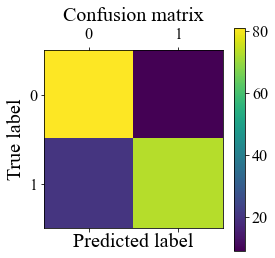

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c4.png', dpi = 300)
#plt.show()

In [43]:
from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,0,1
Actual,,
0,81,9
1,20,73


In [44]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
Accuracy

0.8415300546448088

In [45]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision.round(3))

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

cohen_kappa_score(y_test, y_pred)

Precision: 0.89
0.7849462365591398
0.9
0.8902439024390244


0.6835986406725094

In [46]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred)) 

0.8342857142857142


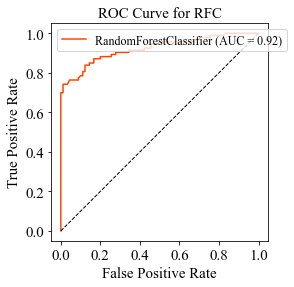

In [47]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_rfc, X_test, y_test, color = 'orangered')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for RFC', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r4.png', dpi = 300)
#plt.show()